In [1]:
import pandas as pd 
import numpy as np
import re
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from fastai.text import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils.multiclass import unique_labels

In [3]:
%matplotlib inline 

In [4]:
df = pd.read_csv('/content/Weather.csv')
pd.set_option('display.max_colwidth', -1)
df = df.reindex(np.random.permutation(df.index)) # this will allow us to take a look at some random rows of the dataset, rather than the first five
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


_unit_id  ...                                                                                                                      tweet_text
7    314960387  ...  @mention s friday at 6 at tha stadium ...if tha weather bad its gone be in tha gym at 3                                       
688  314961068  ...  Very cool. RT @mention: 6 photos of the storm rolling progressively in. {link}                                                
425  314960805  ...  Amen RT @mention Bulls defense is too good to get blown out. They just have to weather this storm and take the lead in the 4th
733  314961113  ...  New:: Tsunami warning EAS TSW on tv and weather radio {link}/                                                                 
672  314961052  ...  New book. Lemonade. 90 degree weather. #perfection                                                                            

[5 rows x 10 columns]

In [5]:
# (tweets, categories) or (rows without header, columns)

df.shape

(1000, 10)

In [6]:
# Counting the number of tweets for each type of sentiment

df.what_emotion_does_the_author_express_specifically_about_the_weather.value_counts()

Negative                                        271
Neutral / author is just sharing information    261
Tweet not related to weather condition          235
Positive                                        231
I can't tell                                    2  
Name: what_emotion_does_the_author_express_specifically_about_the_weather, dtype: int64

Text(0, 0.5, 'Number of tweets')

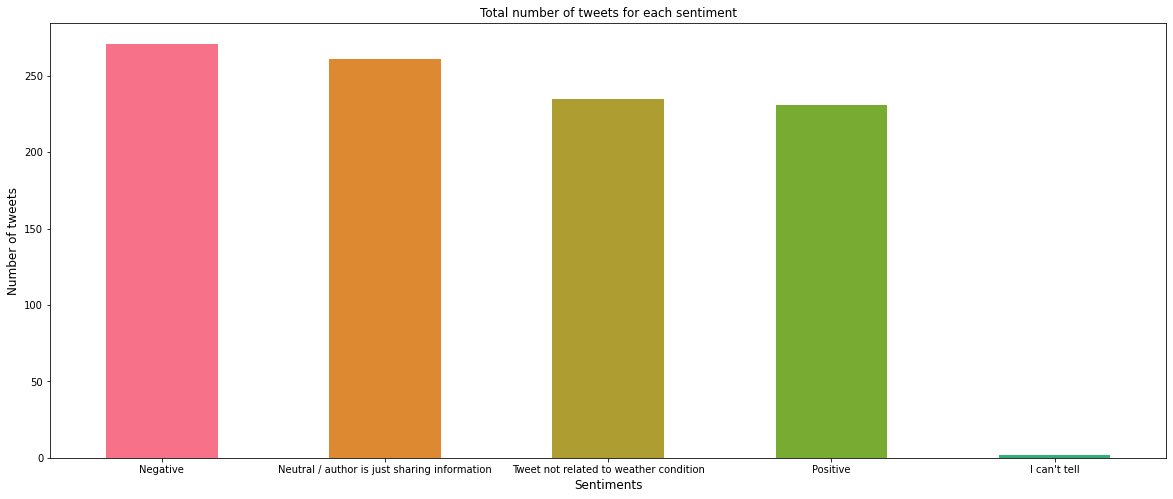

In [7]:
# Plotting the number of tweets for each type of sentiment

#bar_chart

colors = sns.color_palette("husl", 10)
pd.Series(df["what_emotion_does_the_author_express_specifically_about_the_weather"]).value_counts().plot(kind = "bar", color = colors, figsize = (20,8), rot = 0, title = "Total number of tweets for each sentiment")
plt.xlabel('Sentiments', fontsize = 12)
plt.ylabel('Number of tweets', fontsize = 12)

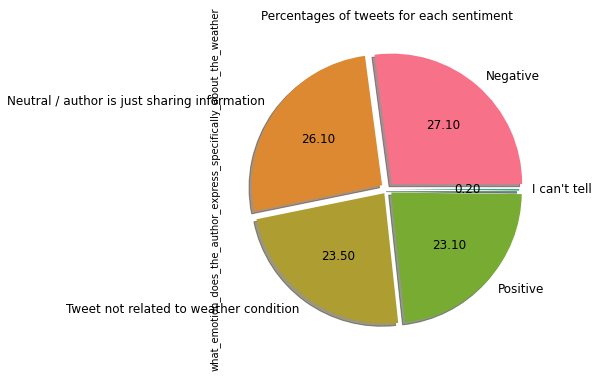

In [8]:
#pie_chart

colors = sns.color_palette("husl", 10)
pd.Series(df["what_emotion_does_the_author_express_specifically_about_the_weather"]).value_counts().plot(kind = "pie",colors = colors, labels = ["Negative", "Neutral / author is just sharing information", "Tweet not related to weather condition", "Positive", "I can't tell"],
          explode = [0.05,0.05,0.04,0.04, 0.01], shadow = True, autopct = '%.2f', fontsize = 12, figsize = (6, 6), title = "Percentages of tweets for each sentiment")

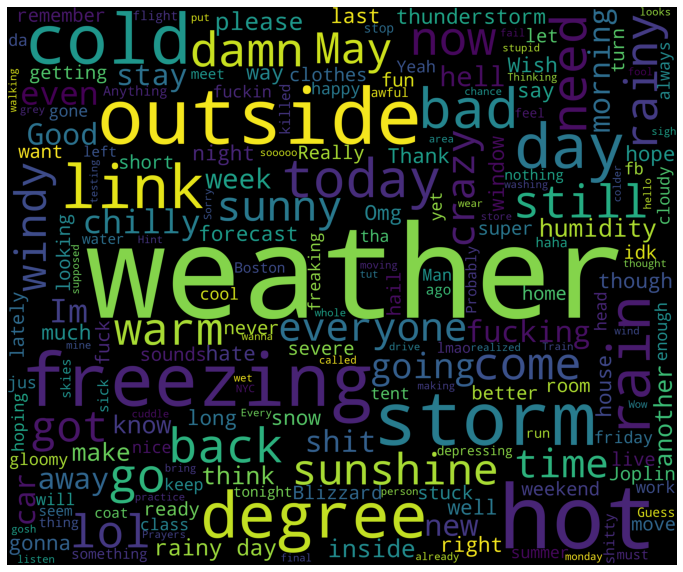

In [9]:
# Wordcloud for negative tweets

new_df = df[df['what_emotion_does_the_author_express_specifically_about_the_weather']=='Negative']
words = ' '.join(new_df['tweet_text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', width = 3000, height = 2500).generate(cleaned_word)
plt.figure(1, figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

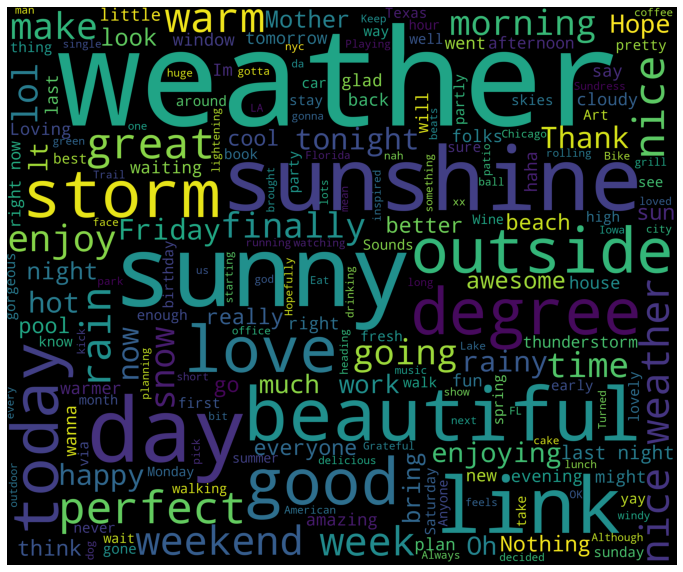

In [10]:
# Wordcloud for positive tweets

new_df = df[df['what_emotion_does_the_author_express_specifically_about_the_weather']=='Positive']
words = ' '.join(new_df['tweet_text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', width = 3000, height = 2500).generate(cleaned_word)
plt.figure(1, figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

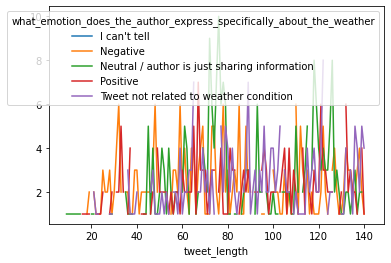

In [11]:
# Plotting the connection between the length of the tweets and the sentiments they are featuring

df['tweet_length'] = df['tweet_text'].apply(len)
df.groupby(['tweet_length', 'what_emotion_does_the_author_express_specifically_about_the_weather']).size().unstack().plot(kind = 'line', stacked = False)

In [12]:
test_percentage = 0.1
df.sort_index(inplace = True)
cutoff = int(test_percentage * df.shape[0])
df[['what_emotion_does_the_author_express_specifically_about_the_weather', 'tweet_text']][:cutoff].to_csv('/content/Tweets_filtered_test.csv', index = False, encoding = 'utf-8')
df[['what_emotion_does_the_author_express_specifically_about_the_weather', 'tweet_text']][cutoff:].to_csv('/content/Tweets_filtered_train.csv', index = False, encoding = 'utf-8')
df[['tweet_text']][cutoff:].to_csv('/content/Tweets_text_only_train.csv', index = False, encoding = 'utf-8')

In [13]:
data = TextClasDataBunch.from_csv('.', '/content/Tweets_filtered_train.csv')
data.show_batch()

/usr/local/lib/python3.6/dist-packages/fastai/text/data.py:339: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  idx_min = (t != self.pad_idx).nonzero().min()


In [14]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '.']

In [15]:
print(data.train_ds[0][0])
print(data.train_ds[1][0])
print(data.train_ds[2][0])

xxbos xxmaj this weather rocks . i like it 4 a little xxunk up !
xxbos xxup rt @mention : xxmaj weather xxmaj xxunk xxunk turns away from xxunk of body live , after xxup xxunk tornado xxunk xxmaj joplin xxmaj missouri . xxup xxunk , xxup xxunk : ...
xxbos xxmaj if xxunk is nice weather , that would be the first week all year with good weather every single day ! <3 it really is # spring


In [16]:
print(data.train_ds[0][0].data[:10])
print(data.train_ds[1][0].data[:10])
print(data.train_ds[2][0].data[:10])

[  2   5  29  15 607   9  17  60  26  65]
[ 2  6 31 12 14  5 15  5  0  0]
[  2   5 141   0  27 100  15  13  53 263]


In [17]:
bs = 24
seed = 333

In [18]:
# Ingesting the data again, but with a 10% holdout that will be used to calibrate the language model

data_lm = (TextList.from_csv('.', '/content/Tweets_text_only_train.csv')
            .random_split_by_pct(0.1, seed = seed)
           # split randomly and keep 10% for validation
            .label_for_lm()           
           # labeling accordingly in order to create a language model
            .databunch(bs = bs))
data_lm.save('/content/data_lm.pkl')

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:217: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


In [19]:
# data_lm = load_data(path, 'data_lm.pkl', bs=bs)
data_lm.show_batch()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.75E-02
Min loss divided by 10: 7.59E-02


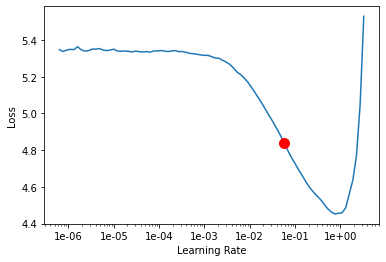

In [20]:
#Creating the language model

learn = language_model_learner(data_lm, AWD_LSTM, drop_mult = 0.3)
learn.lr_find()   # find the learning rate by running a few epochs on the model to plot loss, and then calculate the minimum gradient
learn.recorder.plot(suggestion = True)    # plot the learning rate graph
min_grad_lr = learn.recorder.min_grad_lr

In [21]:
learn.fit_one_cycle(2, min_grad_lr)   # uses large, cyclical learning rates to train models significantly quicker and with higher accuracy

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 7.59E-03
Min loss divided by 10: 2.75E-03


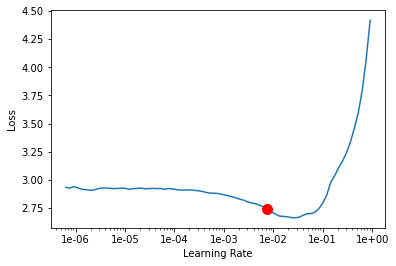

In [22]:
learn.save('fit_head')
#learn.load('fit_head')
learn.unfreeze()    # unfreezing weights 
learn.lr_find()
learn.recorder.plot(suggestion = True)

In [23]:
learn.fit_one_cycle(10, 1e-3)   # training the rest of the NN

In [24]:
learn.save('fine_tuned')
learn.save_encoder('fine_tuned_enc')

In [25]:
TEXT = "I liked "
N_WORDS = 40
N_SENTENCES = 3
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

I liked  in a windy , partly windy weather outside . It 's ooooo xxbosxxbosxxbosxxbosxxbos Loving this weather ! xxbos Oh yeah that yeah we r Snow White we go on gon na take the
I liked  just been wearing Snow Patrol , so this is right up my street . i could finally get two * OUT Stars ! # Smile xxbos This weather is depressing . xxbos RT
I liked  ! Love the Walk In Snowy San Antonio , Texas Weather { link } xxbos Hot and Cold { link } # Cold # Cold # Cold


In [27]:
data_clas = (TextList.from_csv('.', '/content/Tweets_filtered_train.csv', cols = 'tweet_text')               
             .random_split_by_pct(0.1, seed = seed)
             .label_from_df(cols = 0)
             .databunch(bs = bs))
data_clas.save('/content/data_clas.pkl')
data_clas.show_batch()

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:217: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


In [28]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (810 items)
x: TextList
xxbos xxmaj um i would like a xxunk slush . xxmaj thank you . xxup rt @mention : xxunk be on this # xxunk xxunk at xxmaj sonic # xxunk,xxbos xxmaj xxunk wet morning xxrep 5 . bring back the sunshine !,xxbos xxmaj da xxunk i xxunk do to sunny xxunk # xxunk,xxbos @mention xxrep 5 r xxunk who xxunk xxunk idk weather to be xxunk or xxunk xxunk,xxbos xxmaj if you 're in need of any huge xxunk or xxunk , there are xxunk xxunk in the xxmaj xxunk xxmaj river right now . # rain # xxunk # xxmaj xxunk
y: CategoryList
Tweet not related to weather condition,Negative,Tweet not related to weather condition,Negative,Neutral / author is just sharing information
Path: .;

Valid: LabelList (90 items)
x: TextList
xxbos xxmaj loving xxunk storm !,xxbos @mention ca nt xxunk about the weather xxunk ! xxmaj but i 'll take it :),xxbos xxmaj could n't xxunk for a better forecast @mention @mention @mention @mention { link },xxbos xxmaj 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.02E-03
Min loss divided by 10: 2.09E-02


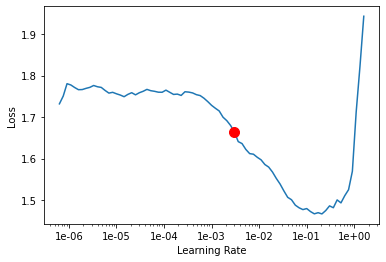

In [29]:
# find and plot the learning rate

learn.lr_find()
learn.recorder.plot(suggestion = True)
min_grad_lr = learn.recorder.min_grad_lr

In [30]:
learn.fit_one_cycle(2, min_grad_lr)
learn.recorder.plot_losses()

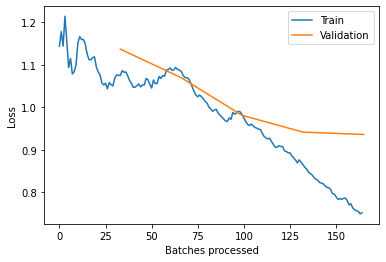

In [31]:
learn.freeze_to(-2)
learn.fit_one_cycle(5, slice(5e-3, 2e-3), moms=(0.8,0.7))
learn.recorder.plot_losses()

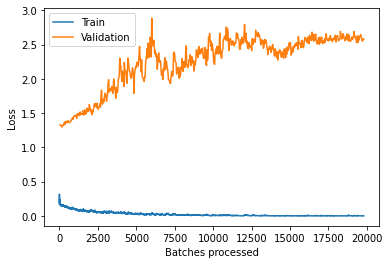

In [33]:
learn.unfreeze()
learn.fit_one_cycle(600, slice(2e-3/100, 2e-3), moms=(0.8,0.7))
learn.recorder.plot_losses()

In [44]:
learn.predict("The weather is nice and warm")

(Category tensor(3),
 tensor(3),
 tensor([1.5119e-06, 6.6254e-07, 5.0467e-06, 9.9999e-01, 1.2082e-07]))

Text(0, 0.5, 'Number of tweets')

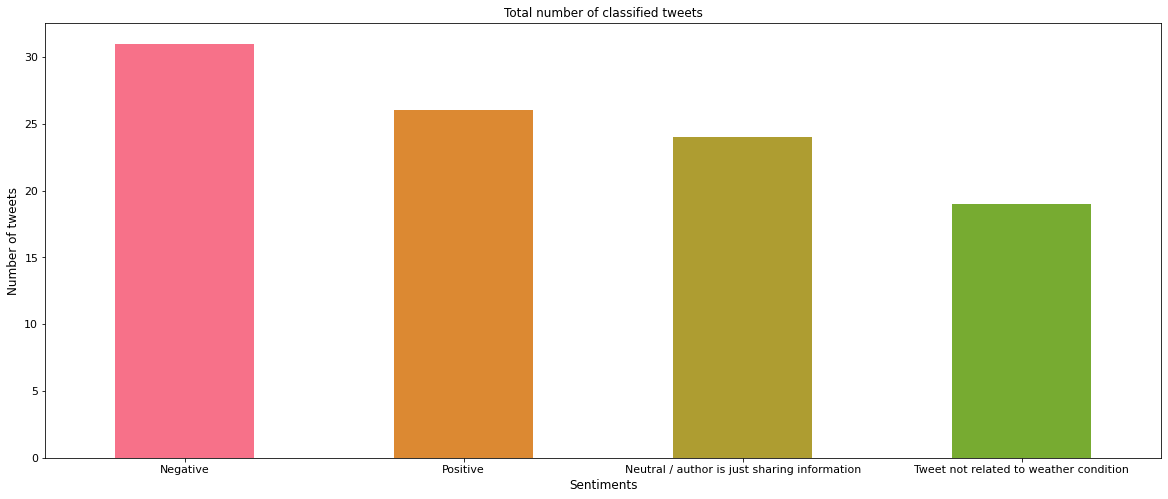

In [47]:
test_df = pd.read_csv("/content/Tweets_filtered_test.csv", encoding = "utf-8")
colors = sns.color_palette("husl", 10) 
pd.Series(test_df["what_emotion_does_the_author_express_specifically_about_the_weather"]).value_counts().plot(kind = "bar", color = colors, figsize = (20,8), fontsize = 11,rot = 0, title = "Total number of classified tweets")
plt.xlabel('Sentiments', fontsize = 12)
plt.ylabel('Number of tweets', fontsize = 12)

In [48]:
test_df['pred_sentiment'] = test_df['tweet_text'].apply(lambda row: str(learn.predict(row)[0]))
print("Test Accuracy: ", accuracy_score(test_df['what_emotion_does_the_author_express_specifically_about_the_weather'], test_df['pred_sentiment']))

Test Accuracy:  0.72


In [49]:
test_df[:20]

what_emotion_does_the_author_express_specifically_about_the_weather  ...                                pred_sentiment
0   Positive                                                            ...  Positive                                    
1   Negative                                                            ...  Positive                                    
2   Neutral / author is just sharing information                        ...  Neutral / author is just sharing information
3   Positive                                                            ...  Positive                                    
4   Neutral / author is just sharing information                        ...  Neutral / author is just sharing information
5   Positive                                                            ...  Positive                                    
6   Neutral / author is just sharing information                        ...  Neutral / author is just sharing information
7   Negative                                                            ...  Neutral / author is just sharing information
8   Negative                                                            ...  Negative                                    
9   Positive                                                            ...  Positive                                    
10  Negative                                                            ...  Positive                                    
11  Tweet not related to weather condition                              ...  Tweet not related to weather condition      
12  Negative                                                            ...  Negative                                    
13  Neutral / author is just sharing information                        ...  Neutral / author is just sharing information
14  Negative                                                            ...  Negative                                    
15  Neutral / author is just sharing information                        ...  Neutral / author is just sharing information
16  Positive                                                            ...  Positive                                    
17  Tweet not related to weather condition                              ...  Tweet not related to weather condition      
18  Negative                                                            ...  Negative                                    
19  Negative                                                            ...  Negative                                    

[20 rows x 3 columns]

In [50]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize = False,
                          title = None,
                          cmap = plt.cm.PuBu):
   
    # Normalization can be applied by setting 'normalize=True'
  
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation = 'nearest', cmap = cmap)
    ax.figure.colorbar(im, ax = ax)
    # We want to show all the ticks...
    ax.set(xticks = np.arange(cm.shape[1]),
           yticks = np.arange(cm.shape[0]),
           # [...] and label them with the respective list entries
           xticklabels = classes, yticklabels = classes,
           title = title,
           ylabel = 'True label',
           xlabel = 'Predicted label')

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation = 45, ha = "right",
             rotation_mode = "anchor")

    # Loop over data dimensions and create text annotations
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha = "center", va = "center",
                    color = "white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

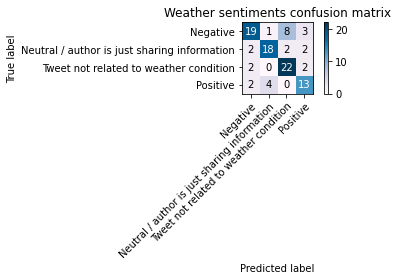

In [51]:
plot_confusion_matrix(test_df['what_emotion_does_the_author_express_specifically_about_the_weather'], test_df['pred_sentiment'], classes=["Negative", "Neutral / author is just sharing information", "Tweet not related to weather condition", "Positive", "I can't tell"], title='Weather sentiments confusion matrix')
plt.show()